### Import necessary libraries

In [58]:
import numpy as np

import matplotlib.pyplot as plt

### ================================
### Step 1: Generate Synthetic Data
### ================================

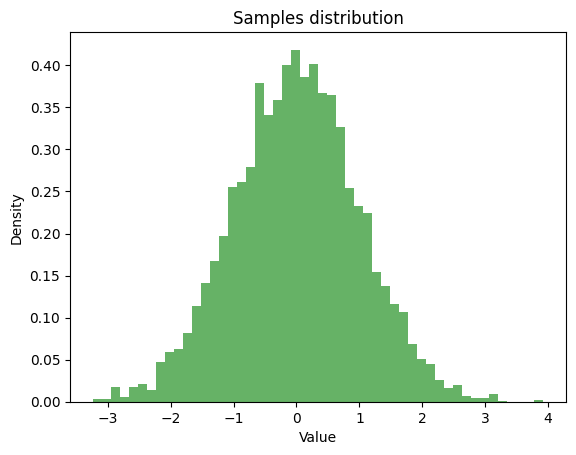

In [59]:
np.random.seed(42)
N = 500  # Total data points
d = 12   # Number of features
train_ratio = 0.7
val_ratio = 0.15

# Generate feature matrix and true weights
X = np.random.normal(0, 1, (N, d))
## Plotting the samples distribution
plt.hist(X.flatten(), bins=50, density=True, alpha=0.6, color='g')
plt.title('Samples distribution')   
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

true_weights = np.linspace(1, 5, d)  # Linearly spaced true weights
epsilon = np.random.normal(0, 0.5, N)  # Noise
y = X @ true_weights + epsilon  # Generate target values

# Split data into train, validation, and test sets
train_size = int(N * train_ratio)
val_size = int(N * val_ratio)
test_size = N - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

### ================================
### Step 2: Ridge Regression Functions
### ================================

In [60]:
def ridge_loss(w, X, y, lam):
    
    """
    NOTE: This is the complete version of the function.
    Calculate the ridge regression loss.
    For each sample, we are calculating the residuals and then summing them up.
    w: Weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    
    Returns: Ridge regression loss
    
    The equation for the ridge regression loss is: L(w) = ||y - Xw||^2 + λ||w||^2
    
    """
    
    # we are calculating the residuals here
    residuals = y - X @ w
    # we are returning the sum of the residuals squared plus the sum of the weights squared times the lambda
    return np.sum(residuals**2) + lam * np.sum(w**2)

def ridge_gradient(w, X, y, lam):
    
    """
     We are computing the gradient of the ridge regression with respect to the weights w. we return the gradient - ideally the derivative of the loss function with respect to the weights.
    
    NOTE: This is the complete version of the function.
    Calculate the gradient of the ridge regression loss we calculated using the ridge_loss function.
    w: Weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    
    Returns: Gradient of ridge regression loss with respect to weights
    
    The equation for the gradient of the ridge regression loss is: ∇L(w) = 2(X^T(xw - y) + λw)
    """
    residuals = y - X @ w
    grad_residuals = -2 * X.T @ residuals
    grad_regularization = 2 * lam * w
    grad = grad_residuals + grad_regularization
    grad /= len(y)
    # grad = np.clip(grad, -1e3, 1e3)
    return grad


In [61]:

def gradient_descent(loss_fn, grad_fn, w_init, X, y, lam, lr=0.01, tol=1e-6, max_iters=1000):
    """
    we are minimizing the ridge regression loss using gradient descent by iteratively updating the weights. We are going to stop the iteration when the difference between the new weights and the old weights is less than the tolerance.
    
    NOTE: This is the complete version of the function.
    Perform gradient descent to minimize the ridge regression loss.
    For each iteration, we calculate the gradient of the loss with respect to the weights and update the weights.
    We do this by calling the loss_fn and grad_fn functions.
    
    loss_fn: Function to calculate the loss
    grad_fn: Function to calculate the gradient
    w_init: Initial weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    lr: Learning rate
    tol: Tolerance for stopping condition
    max_iters: Maximum number of iterations
    
    Returns: Final weights after optimization
    """
    w = w_init
    # we are iterating through the maximum epochs
    for i in range(max_iters):
        # For each epoch we calculate the gradient & update the weights
        grad = grad_fn(w, X, y, lam)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w, ord=2) < tol:
            break
        w = w_new
    return w


### ================================
### Step 3: Variance and Bias Calculation
### ================================

In [62]:
def calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas, num_datasets=20,
                            sub_sample_size=50):
    """
    NOTE:  This method was given to you as a complete function. We do not have to implement it.
    
    Calculate the bias and variance for ridge regression models trained on multiple datasets.
    """
    biases, variances = [], []
    for lam in lambdas:
        predictions = []
        for _ in range(num_datasets):
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=sub_sample_size, replace=True)
            X_sample, y_sample = X_train[indices], y_train[indices]
            
            # Train ridge regression
            w_init = np.zeros(d)
            w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_sample, y_sample, lam)
            
            # Predict on validation data
            predictions.append(X_val @ w)
        
        # Average predictions
        predictions = np.array(predictions)
        mean_prediction = np.mean(predictions, axis=0)
        bias = np.mean((mean_prediction - y_val)**2)
        variance = np.mean(np.var(predictions, axis=0))
        
        biases.append(bias)
        variances.append(variance)
    
    return biases, variances

### ================================
### Step 4: Plotting Functions
### ================================

In [63]:
# Empty sections for students to complete
lambdas = [a * 10**b for b in range(-5, 3) for a in range(1, 10)]
def plot_coefficients_vs_lambda():
    plt.figure(figsize=(10, 6))
    coefficients = []
    for lam in lambdas:
        # Initialize weights to zeros
        w_init = np.zeros(d)
        # Perform gradient descent - it goes through the maximum epochs and updates the weights, it returns the optimal weights
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        # For each lambda we are appending the optimal weights to the coefficients list
        coefficients.append(w)
    coefficients = np.array(coefficients)
    print(coefficients.shape) 
    
    plt.figure(figsize=(12, 8))
    for i in range(coefficients.shape[1]):
        plt.plot(lambdas, coefficients[:, i], label=f"w{i+1}")


    plt.yscale("log")
    # plt.yscale("log")
    plt.xlabel("λ (log scale)")
    plt.ylabel("Coefficients (w)")
    plt.title("Coefficients vs. λ (Ridge Regression)")
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0))
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_rmse_vs_lambda():
    plt.figure(figsize=(10, 6))
    # lambdas = np.logspace(-5, 5, num=100)
    rmses = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        rmse = np.sqrt(np.mean((X_val @ w - y_val)**2))
        rmses.append(rmse)
    plt.plot(lambdas, rmses)
    plt.yscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. lambda')
    plt.show()
    optimal_lambda = lambdas[np.argmin(rmses)]  # Get lambda with lowest RMSE
    return optimal_lambda
    

def plot_predicted_vs_true(lambda_val):
    w_init = np.zeros(d)
    w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lambda_val)
    plt.figure(figsize=(10, 6))
    
    plt.scatter(y_test, X_test @ w, alpha=0.5)
    # plt.plot([0, 30], [0, 30], color='red', linestyle='--')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted vs. true values')
    plt.show()

def plot_bias_variance_tradeoff():
    biases, variances = calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas)
    plt.figure(figsize=(10, 6))
    plt.plot(lambdas, biases, label='Bias')
    plt.plot(lambdas, variances, label='Variance')
    plt.yscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Bias/Variance')
    plt.legend()
    plt.title('Bias/Variance tradeoff')
    plt.show()

### ================================
### Step 5: Main Execution
### ================================

(72, 12)


<Figure size 1000x600 with 0 Axes>

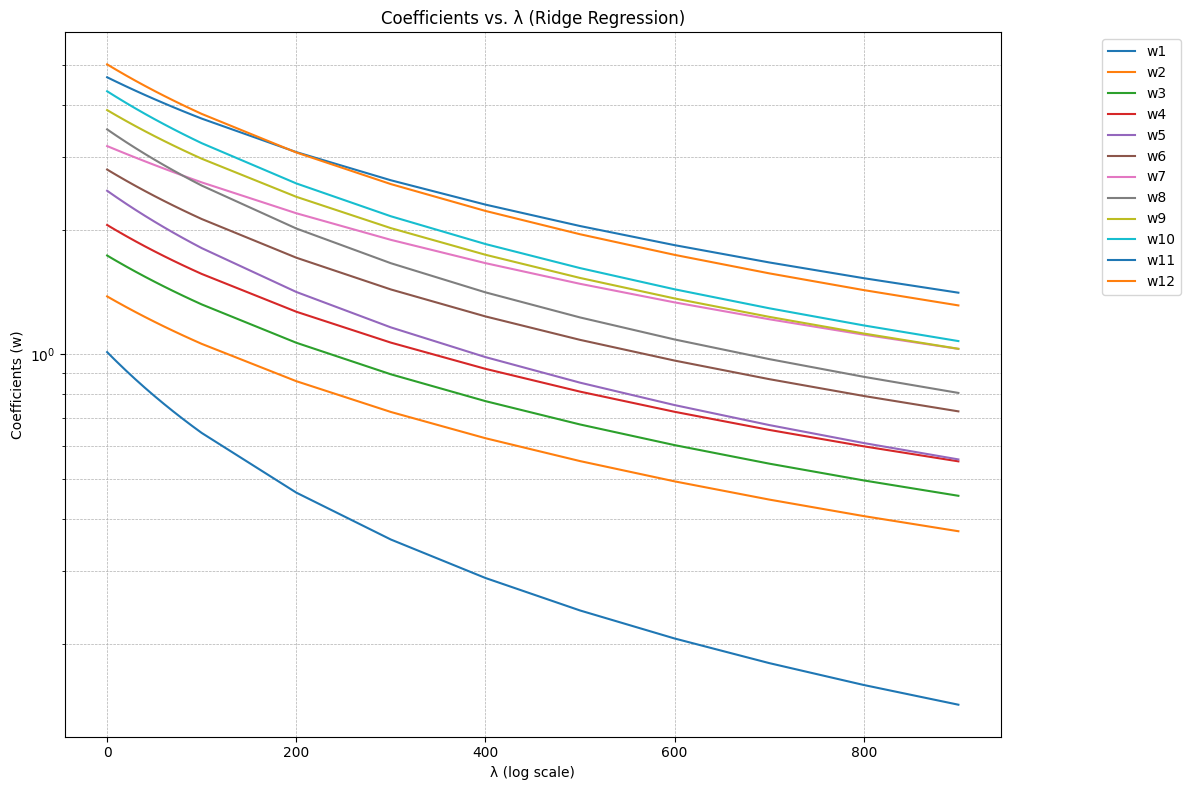

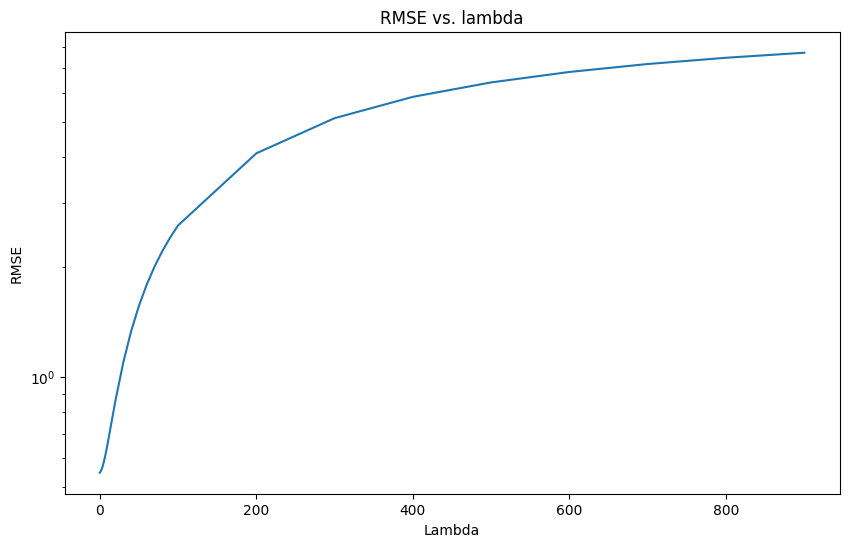

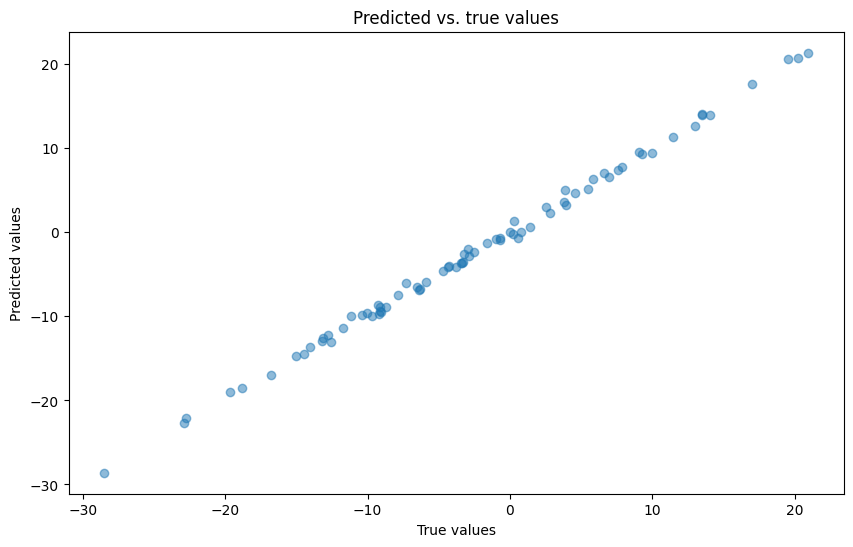

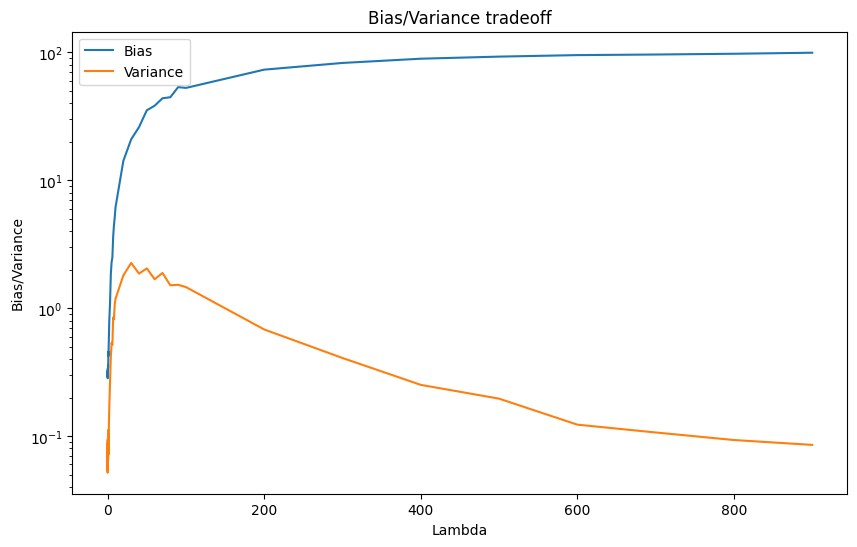

In [64]:
# Please complete this field.
if __name__ == '__main__':
    plot_coefficients_vs_lambda()
    optimal_lambda = plot_rmse_vs_lambda()
    plot_predicted_vs_true(optimal_lambda)
    plot_bias_variance_tradeoff()

### DISCUSSION

As λ increases, the coefficients shrink towards zero. This is expected behavior in ridge regression, as the regularization term penalizes large coefficients, leading to more stable and less complex models.

The trade-off between RMSE and λ shows that there is an optimal λ value where the RMSE is minimized. For very small λ values, the model may overfit the training data, leading to high variance and poor generalization. For very large λ values, the model may underfit, leading to high bias. The optimal λ balances these two extremes, providing the best generalization performance.

From the bias-variance trade-off plot, we observe that as λ increases, the bias increases and the variance decreases. This is because higher λ values lead to simpler models with less flexibility, reducing variance but increasing bias. The goal is to find a λ value that minimizes the total error, which is the sum of bias and variance.